In [1]:
# from sklearn.neighbors import KNeighborsClassifier
from sklearn import utils, metrics
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
# 1. 데이터를 준비 : 학습용, 테스트용  --> 지도학습 (데이터 들, 레이블)
org_df = pd.read_csv('ETL_DATA/OsanDataset.csv')  # CSV --> DataFrame
org_df.head()

,id,acc_sum,lon1,lat1,lon2,lat2,cctv,cross,speedBump,parking,...,youth,baby,build,latM,lonM,youchiwon,elementry,academy,gym,school_zone
0,0,0,126.994216,37.174182,126.995336,37.175089,0,0,0,0,...,0.0,0.0,0.0,37.173729,126.994776,0,0,0,0,0
1,1,0,126.994210,37.175084,126.995330,37.175990,0,0,0,0,...,0.0,0.0,0.0,37.174631,126.994770,0,0,0,0,0
2,2,0,126.994204,37.175985,126.995324,37.176891,0,0,0,0,...,0.0,0.0,0.0,37.175532,126.994764,0,0,0,0,0
3,3,0,126.994198,37.176887,126.995318,37.177793,0,0,0,0,...,0.0,0.0,0.0,37.176433,126.994758,0,0,0,0,0
4,4,0,126.995342,37.174187,126.996463,37.175093,0,0,0,0,...,0.0,0.0,0.0,37.173734,126.995902,0,0,0,0,0


In [3]:
# 위치 데이터 삭제 및 데이터 컬럼 정렬
study_df = org_df[['acc_sum','youth','baby','build','youchiwon','elementry','gym','academy','school_zone','cctv','cross','parking','speedBump','trafficLight']]

print(len(study_df))
print(study_df)

4510
      acc_sum  youth  baby  build  youchiwon  elementry  gym  academy  \
0           0    0.0   0.0    0.0          0          0    0        0   
1           0    0.0   0.0    0.0          0          0    0        0   
2           0    0.0   0.0    0.0          0          0    0        0   
3           0    0.0   0.0    0.0          0          0    0        0   
4           0    0.0   0.0    0.0          0          0    0        0   
...       ...    ...   ...    ...        ...        ...  ...      ...   
4505        0    0.0   0.0    0.0          0          0    0        0   
4506        0    0.0   0.0    0.0          0          0    0        0   
4507        0    0.0   0.0    0.0          0          0    0        0   
4508        0    0.0   0.0    0.0          0          0    0        0   
4509        0    0.0   0.0    0.0          0          0    0        0   

      school_zone  cctv  cross  parking  speedBump  trafficLight  
0               0     0      0        0          0 

In [4]:
# 2. 훈련용, 학습용으로 분리 (8:2)
study_df = utils.shuffle(study_df)
print(study_df)
dataLen = study_df.shape[0] # 데이터프레임(엑셀 표)의 행 개수
studySize = int(dataLen * 0.8)


study_data = study_df.iloc[0:studySize, 1: ]
study_label = study_df.iloc[0:studySize, [0] ]
test_data = study_df.iloc[studySize:, 1: ]
test_label = study_df.iloc[studySize:, [0] ]
print(dataLen,' ',len(study_data),' ',len(test_data))

      acc_sum  youth  baby    build  youchiwon  elementry  gym  academy  \
154         0    0.0   0.0     0.00          0          0    0        0   
2588        0    0.0   0.0     0.00          0          0    1        0   
1125        0    0.0   0.0   200.56          0          0    0        0   
3472        0    0.0   0.0     0.00          2          0    2        0   
3358        3    0.0   0.0  1819.12          5          0    1       11   
...       ...    ...   ...      ...        ...        ...  ...      ...   
3664        0   11.0   8.0   710.90          3          0    3        1   
3461        0    0.0   0.0     0.00          3          0    5        0   
2883        0    0.0   0.0     0.00          0          0    0        0   
1915        0    0.0   0.0     0.00          0          0    0        0   
1408        0    0.0   0.0     0.00          3          0    0        1   

      school_zone  cctv  cross  parking  speedBump  trafficLight  
154             0     0      0  

In [5]:
# 3-1. 머신러닝 알고리즘 선택 (Knn)
# clf = KNeighborsClassifier(n_neighbors=7)

# 3-2. 머신러닝 알고리즘 선택 (의사결정트리 -> 별도 파일)

# 3-3. 머신러닝 알고리즘 선택 (랜덤포레스트)
# n_estimators > 사용할 트리수 ,  min_samples_leaf > 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수, 과적합 제어 용도
clf = RandomForestClassifier(n_estimators=100, min_samples_leaf=3, random_state=0)

# 4. 학습데이터로 훈련시키기 ---> 시간소요
clf.fit( study_data, study_label )

# 5.<모의고사> 모델의 정답률(신뢰도) : 테스트용(20%) 데이터 --> 모델에 대한 신뢰도 테스트
answers = clf.predict(test_data)
score = metrics.accuracy_score(answers, test_label) * 100
print('정답률 : %5.2f %%' % (score))


정답률 : 92.68 %


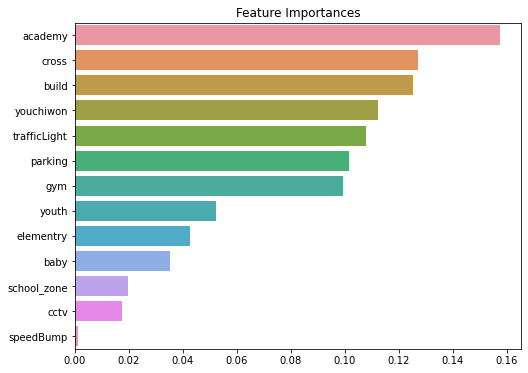

In [6]:
# Random Forest의 각 피처의 중요도 시각화 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = study_data.columns)
ftr_top13 = ftr_importances.sort_values(ascending=False)[:13]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top13, y=ftr_top13.index)
plt.show()

In [7]:
import joblib
#### 4. 모델을 덤프 ####
joblib.dump(clf, 'OsanPredict_RF.dmp')
print('dump success')

dump success
